In [2]:
#import funtions:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [3]:
#loading data:
data=pd.read_excel(r"C:\Users\jenis\Desktop\New folder\copper\Copper_Set.xlsx")

In [4]:
data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
data.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
#data.shape-> the dimensions of a DataFrame or an ndarray.
data.shape     

(181673, 14)

In [8]:
# verify the no of unique values in each features
for i in list(data.columns):
    print(f"{i}:{data[i].nunique()}")

id:181671
item_date:252
quantity tons:181673
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16563
product_ref:33
delivery date:28
selling_price:9795


In [9]:
# verify datatypes of all features
data.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [10]:
#Data Cleaning :
#object to datetime:

data['item_date'] = pd.to_datetime(data['item_date'], format='%Y%m%d', errors='coerce').dt.date
data['delivery date'] = pd.to_datetime(data['delivery date'], format='%Y%m%d', errors='coerce').dt.date
data['item_date'] = pd.to_datetime(data['item_date'])
data['delivery date'] = pd.to_datetime(data['delivery date'])
data['delivery_time_taken']=(data['item_date']-data['delivery date']).abs().dt.days

In [11]:
#Data Cleaning :
#object to numeric:

data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors='coerce')
data['customer'] = pd.to_numeric(data['customer'], errors='coerce')
data['country'] = pd.to_numeric(data['country'], errors='coerce')
data['application'] = pd.to_numeric(data['application'], errors='coerce')
data['thickness'] = pd.to_numeric(data['thickness'], errors='coerce')
data['width'] = pd.to_numeric(data['width'], errors='coerce')
data['selling_price'] = pd.to_numeric(data['selling_price'], errors='coerce')

In [12]:
data.loc[data['material_ref'].str.contains('0{10,}', na=False), 'material_ref'] = np.nan     

In [13]:
# id have all are unique values.
# drop id 
data.drop(columns=['id'], inplace=True)

In [14]:
data

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,2021-04-01,1047.00,0.0
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,90.0
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,90.0
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,NaN,164141591,2020-07-01,591.00,1.0
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,NaN,164141591,2020-07-01,589.00,1.0
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,NaN,164141591,2020-07-01,619.00,1.0
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,NaN,164141591,2020-07-01,601.00,1.0


In [15]:
#T--> refers transpose operation, it switches the rows and columns of the DataFrame, effectively transposing the summary statistics.
data.describe().T                     

,count,mean,min,25%,50%,75%,max,std
item_date,181670,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181672.0,5874.925754,-2000.0,10.970298,30.364635,67.160612,1000000000.0,2349081.241674
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181670,2021-01-25 22:44:26.223372032,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181672.0,1918.035505,-1160.0,669.0,812.0,953.0,100001015.0,331795.642555


In [16]:
# check all null values in data
data.isnull().sum()

item_date                   3
quantity tons               1
customer                    1
country                    28
status                      2
item type                   0
application                24
thickness                   1
width                       0
material_ref           100610
product_ref                 0
delivery date               3
selling_price               1
delivery_time_taken         6
dtype: int64

In [17]:
# Handling null values using median and mode:
# median - middle value in dataset (asc/desc)
# numerical datatype using median

data['quantity tons'].fillna(data['quantity tons'].median(), inplace=True)
data['customer'].fillna(data['customer'].median(), inplace=True)
data['country'].fillna(data['country'].median(), inplace=True)
data['width'].fillna(data['width'].median(), inplace=True)
data['thickness'].fillna(data['thickness'].median(), inplace=True)
data['selling_price'].fillna(data['selling_price'].median(), inplace=True)

In [18]:
data['material_ref'].fillna('unknown', inplace=True)

In [19]:
# Handling null values using median and mode:
# mode - value that appears most frequently in dataset
# object datatype using mode

data['status'].fillna(data['status'].mode().iloc[0], inplace=True)
data['item type'].fillna(data['item type'].mode().iloc[0], inplace=True)
data['application'].fillna(data['application'].mode().iloc[0], inplace=True)
data['product_ref'].fillna(data['product_ref'].mode().iloc[0], inplace=True)
data['item_date'].fillna(data['item_date'].mode().iloc[0], inplace=True)
data['delivery date'].fillna(data['delivery date'].mode().iloc[0], inplace=True)
data['delivery_time_taken'].fillna(data['delivery_time_taken'].median(),inplace=True)

In [20]:
data.isnull().sum()

item_date              0
quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
material_ref           0
product_ref            0
delivery date          0
selling_price          0
delivery_time_taken    0
dtype: int64

In [21]:
# to convert the data type:
data['country'] = data['country'].astype(np.int64)

In [22]:
#it provides the structure of dataset and identifying any missing or inconsistent data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   item_date            181673 non-null  datetime64[ns]
 1   quantity tons        181673 non-null  float64       
 2   customer             181673 non-null  float64       
 3   country              181673 non-null  int64         
 4   status               181673 non-null  object        
 5   item type            181673 non-null  object        
 6   application          181673 non-null  float64       
 7   thickness            181673 non-null  float64       
 8   width                181673 non-null  float64       
 9   material_ref         181673 non-null  object        
 10  product_ref          181673 non-null  int64         
 11  delivery date        181673 non-null  datetime64[ns]
 12  selling_price        181673 non-null  float64       
 13  delivery_time_

In [23]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,181663,181664,181665,181666,181667,181668,181669,181670,181671,181672
item_date,2021-04-01 00:00:00,2021-04-01 00:00:00,2021-04-01 00:00:00,2021-04-01 00:00:00,2021-04-01 00:00:00,2021-04-01 00:00:00,2021-04-01 00:00:00,2021-04-01 00:00:00,2021-04-01 00:00:00,2021-04-01 00:00:00,...,2020-07-02 00:00:00,2020-07-02 00:00:00,2020-07-02 00:00:00,2020-07-02 00:00:00,2020-07-02 00:00:00,2020-07-02 00:00:00,2020-07-02 00:00:00,2020-07-02 00:00:00,2020-07-02 00:00:00,2020-07-02 00:00:00
quantity tons,54.151139,768.024839,386.127949,202.411065,785.526262,225.790676,3.522613,113.387124,69.071853,630.626917,...,1203.157826,603.11494,6.169226,82.123794,106.783299,102.482422,208.086469,4.235594,-2000.0,406.686538
customer,30156308.0,30202938.0,30153963.0,30349574.0,30211560.0,30202938.0,30209509.0,30342192.0,30341428.0,30202938.0,...,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0
country,28,25,30,32,28,25,30,32,38,25,...,25,25,25,25,25,25,25,25,25,25
status,Won,Won,Won,Won,Won,Won,Draft,Won,Won,Won,...,Won,Won,Won,Won,Won,Won,Won,Won,Won,Won
item type,W,W,WI,S,W,W,W,W,S,W,...,W,W,W,W,W,W,W,W,W,W
application,10.0,41.0,28.0,59.0,10.0,41.0,41.0,41.0,10.0,41.0,...,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0
thickness,2.0,0.8,0.38,2.3,4.0,1.5,0.38,0.68,0.6,1.5,...,0.72,0.85,0.71,1.18,0.96,0.96,0.95,0.71,0.85,0.71
width,1500.0,1210.0,952.0,1317.0,2000.0,1265.0,1125.0,1220.0,1275.0,1165.0,...,1240.0,1240.0,1300.0,1220.0,1240.0,1220.0,1500.0,1250.0,1250.0,1240.0
material_ref,DEQ1 S460MC,unknown,S0380700,DX51D+ZM310MAO 2.3X1317,2_S275JR+AR-CL1,unknown,NBW_L+_A_1125_0.4,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown


In [24]:
#EXPLORATORY DATA ANALYSIS:
#Exploring skewness and outliers
data_eda=data.copy(True)

In [25]:
data_eda

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91.0
1,2021-04-01,768.024839,30202938.0,25,Won,W,41.0,0.80,1210.0,unknown,1668701718,2021-04-01,1047.00,0.0
2,2021-04-01,386.127949,30153963.0,30,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,90.0
3,2021-04-01,202.411065,30349574.0,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,90.0
4,2021-04-01,785.526262,30211560.0,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25,Won,W,41.0,0.96,1220.0,unknown,164141591,2020-07-01,591.00,1.0
181669,2020-07-02,208.086469,30200854.0,25,Won,W,41.0,0.95,1500.0,unknown,164141591,2020-07-01,589.00,1.0
181670,2020-07-02,4.235594,30200854.0,25,Won,W,41.0,0.71,1250.0,unknown,164141591,2020-07-01,619.00,1.0
181671,2020-07-02,-2000.000000,30200854.0,25,Won,W,41.0,0.85,1250.0,unknown,164141591,2020-07-01,601.00,1.0


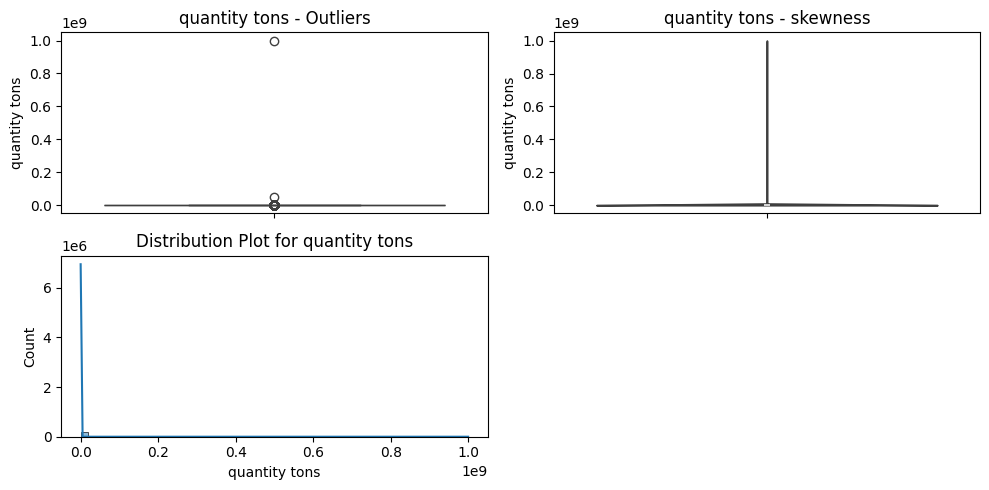

In [26]:
# find outliers - box plot & skewed data - violin plot 
# Creating quantity tons subplots:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Boxplot
sns.boxplot(ax=axes[0, 0], data=data_eda['quantity tons'])
axes[0, 0].set_title('quantity tons - Outliers')

# Violin plot
sns.violinplot(ax=axes[0, 1], data=data_eda['quantity tons'])
axes[0, 1].set_title('quantity tons - skewness')

# Histogram
sns.histplot(data=data_eda, x='quantity tons', kde=True, bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Distribution Plot for quantity tons')

# Hide empty subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

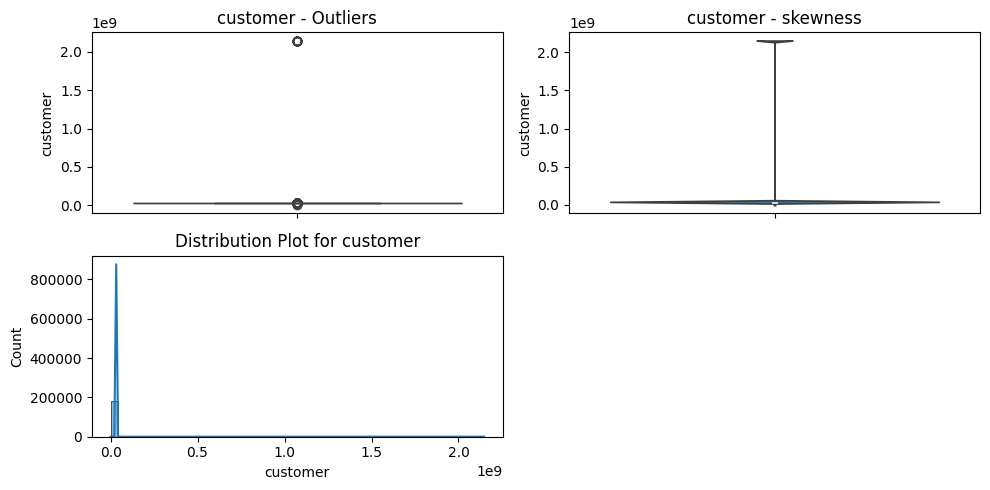

In [27]:
# Creating customer subplots:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Boxplot
sns.boxplot(ax=axes[0, 0], data=data_eda['customer'])
axes[0, 0].set_title('customer - Outliers')

# Violin plot
sns.violinplot(ax=axes[0, 1], data=data_eda['customer'])
axes[0, 1].set_title('customer - skewness')

# Histogram
sns.histplot(data=data_eda, x='customer', kde=True, bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Distribution Plot for customer')

# Hide empty subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

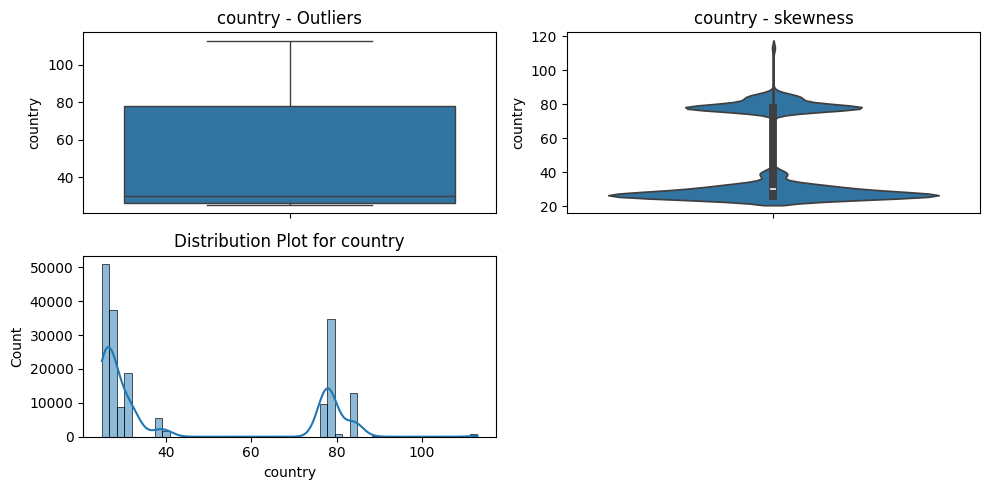

In [28]:
# Creating country subplots:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Boxplot
sns.boxplot(ax=axes[0, 0], data=data_eda['country'])
axes[0, 0].set_title('country - Outliers')

# Violin plot
sns.violinplot(ax=axes[0, 1], data=data_eda['country'])
axes[0, 1].set_title('country - skewness')

# Histogram
sns.histplot(data=data_eda, x='country', kde=True, bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Distribution Plot for country')

# Hide empty subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

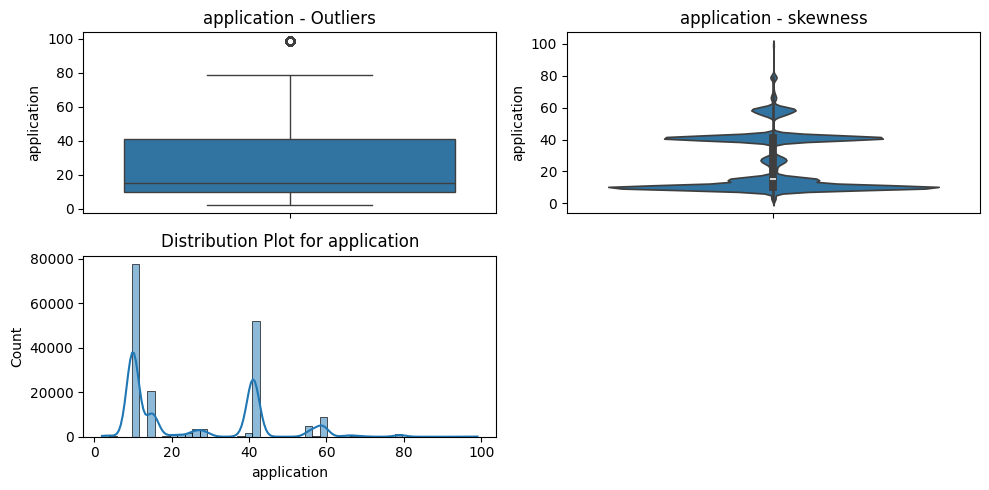

In [29]:
# Creating application subplots:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Boxplot
sns.boxplot(ax=axes[0, 0], data=data_eda['application'])
axes[0, 0].set_title('application - Outliers')

# Violin plot
sns.violinplot(ax=axes[0, 1], data=data_eda['application'])
axes[0, 1].set_title('application - skewness')

# Histogram
sns.histplot(data=data_eda, x='application', kde=True, bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Distribution Plot for application')

# Hide empty subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

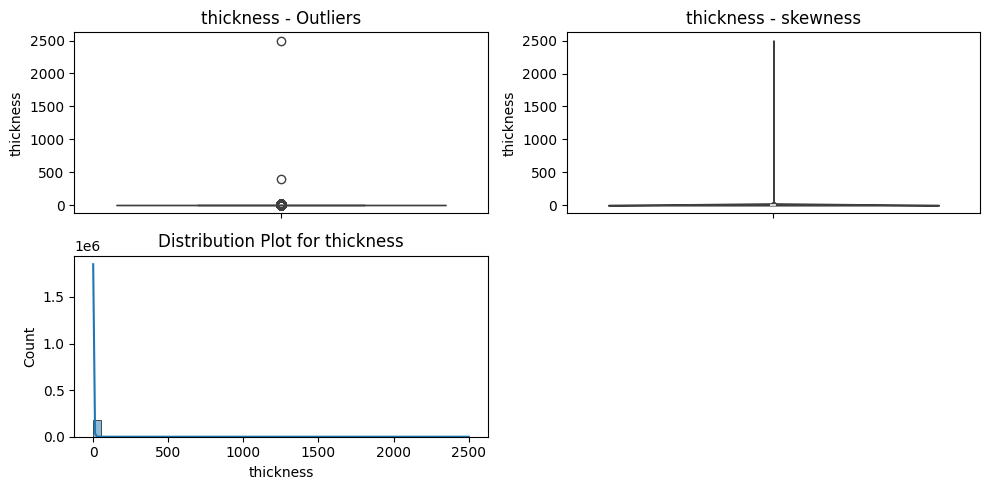

In [30]:
# Creating thickness subplots:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Boxplot
sns.boxplot(ax=axes[0, 0], data=data_eda['thickness'])
axes[0, 0].set_title('thickness - Outliers')

# Violin plot
sns.violinplot(ax=axes[0, 1], data=data_eda['thickness'])
axes[0, 1].set_title('thickness - skewness')

# Histogram
sns.histplot(data=data_eda, x='thickness', kde=True, bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Distribution Plot for thickness')

# Hide empty subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

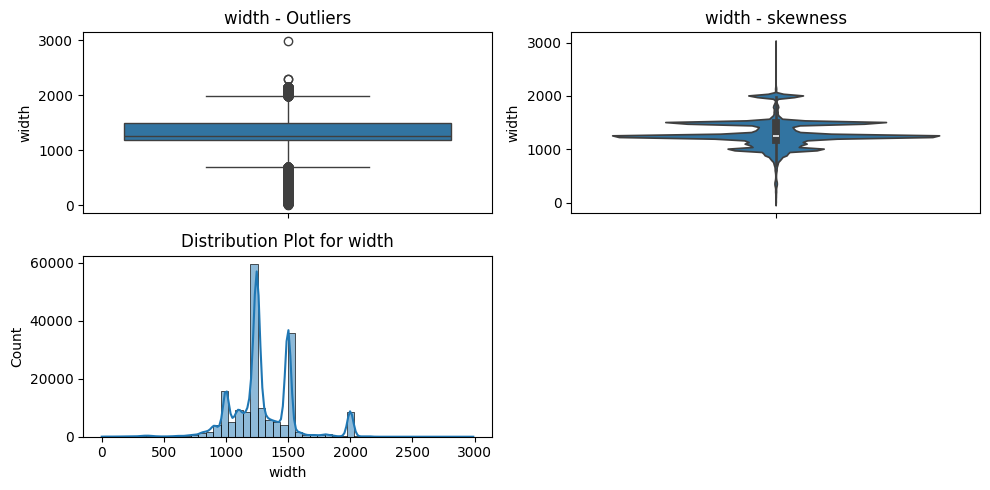

In [31]:
# Creating width subplots:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Boxplot
sns.boxplot(ax=axes[0, 0], data=data_eda['width'])
axes[0, 0].set_title('width - Outliers')

# Violin plot
sns.violinplot(ax=axes[0, 1], data=data_eda['width'])
axes[0, 1].set_title('width - skewness')

# Histogram
sns.histplot(data=data_eda, x='width', kde=True, bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Distribution Plot for width')

# Hide empty subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

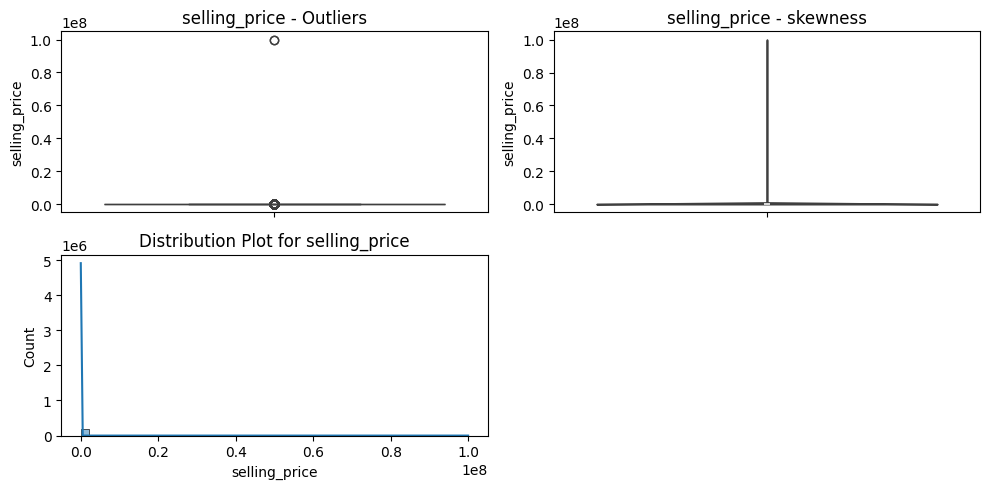

In [32]:
# Creating selling_price subplots:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Boxplot
sns.boxplot(ax=axes[0, 0], data=data_eda['selling_price'])
axes[0, 0].set_title('selling_price - Outliers')

# Violin plot
sns.violinplot(ax=axes[0, 1], data=data_eda['selling_price'])
axes[0, 1].set_title('selling_price - skewness')

# Histogram
sns.histplot(data=data_eda, x='selling_price', kde=True, bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Distribution Plot for selling_price')

# Hide empty subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

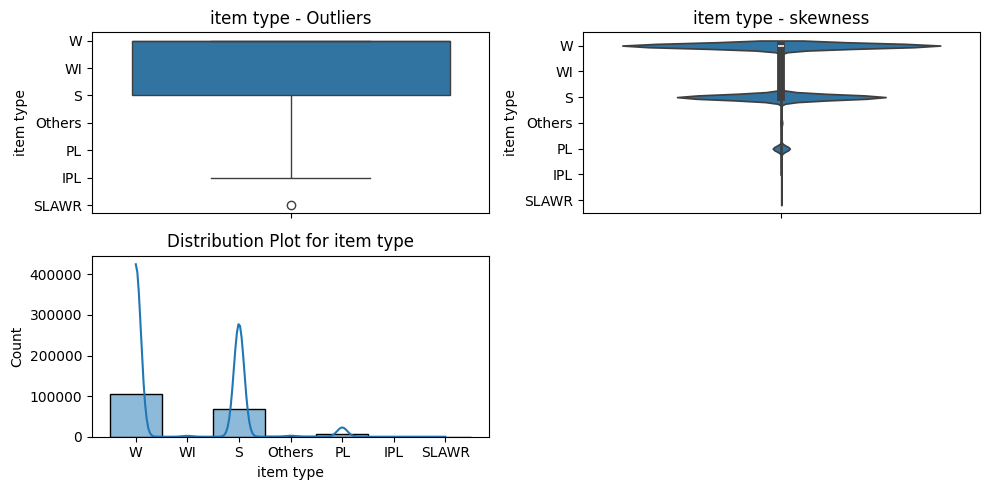

In [33]:
# Create item type subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Boxplot
sns.boxplot(ax=axes[0, 0], data=data_eda['item type'])
axes[0, 0].set_title('item type - Outliers')

# Violin plot
sns.violinplot(ax=axes[0, 1], data=data_eda['item type'])
axes[0, 1].set_title('item type - skewness')

# Histogram
sns.histplot(data=data_eda, x='item type', kde=True, bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Distribution Plot for item type')

# Hide empty subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [34]:
#quantity tons, thickness, width and selling price data are skewd.so using the log transformation method to handle the skewness data:
#by applying the natural logarithm transformation, he skewed distribution of the original variable for certain types of analysis or modeling.

skew_data=data_eda.copy(True)
skew_data['quantity tons_log'] = np.log(skew_data['quantity tons'])
skew_data['thickness_log'] = np.log(skew_data['thickness'])
skew_data['selling_price_log'] = np.log(skew_data['selling_price'])


In [35]:
skew_data

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time_taken,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91.0,3.991779,0.693147,6.749931
1,2021-04-01,768.024839,30202938.0,25,Won,W,41.0,0.80,1210.0,unknown,1668701718,2021-04-01,1047.00,0.0,6.643822,-0.223144,6.953684
2,2021-04-01,386.127949,30153963.0,30,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,90.0,5.956169,-0.967584,6.468211
3,2021-04-01,202.411065,30349574.0,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,90.0,5.310301,0.832909,6.643790
4,2021-04-01,785.526262,30211560.0,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,31.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25,Won,W,41.0,0.96,1220.0,unknown,164141591,2020-07-01,591.00,1.0,4.629691,-0.040822,6.381816
181669,2020-07-02,208.086469,30200854.0,25,Won,W,41.0,0.95,1500.0,unknown,164141591,2020-07-01,589.00,1.0,5.337954,-0.051293,6.378426
181670,2020-07-02,4.235594,30200854.0,25,Won,W,41.0,0.71,1250.0,unknown,164141591,2020-07-01,619.00,1.0,1.443523,-0.342490,6.428105
181671,2020-07-02,-2000.000000,30200854.0,25,Won,W,41.0,0.85,1250.0,unknown,164141591,2020-07-01,601.00,1.0,NaN,-0.162519,6.398595


In [36]:
skew_data.isna().sum()

item_date              0
quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
material_ref           0
product_ref            0
delivery date          0
selling_price          0
delivery_time_taken    0
quantity tons_log      4
thickness_log          0
selling_price_log      5
dtype: int64

In [37]:
skew_data.dropna(inplace=True)

In [38]:
skew_data.isna().sum()

item_date              0
quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
material_ref           0
product_ref            0
delivery date          0
selling_price          0
delivery_time_taken    0
quantity tons_log      0
thickness_log          0
selling_price_log      0
dtype: int64

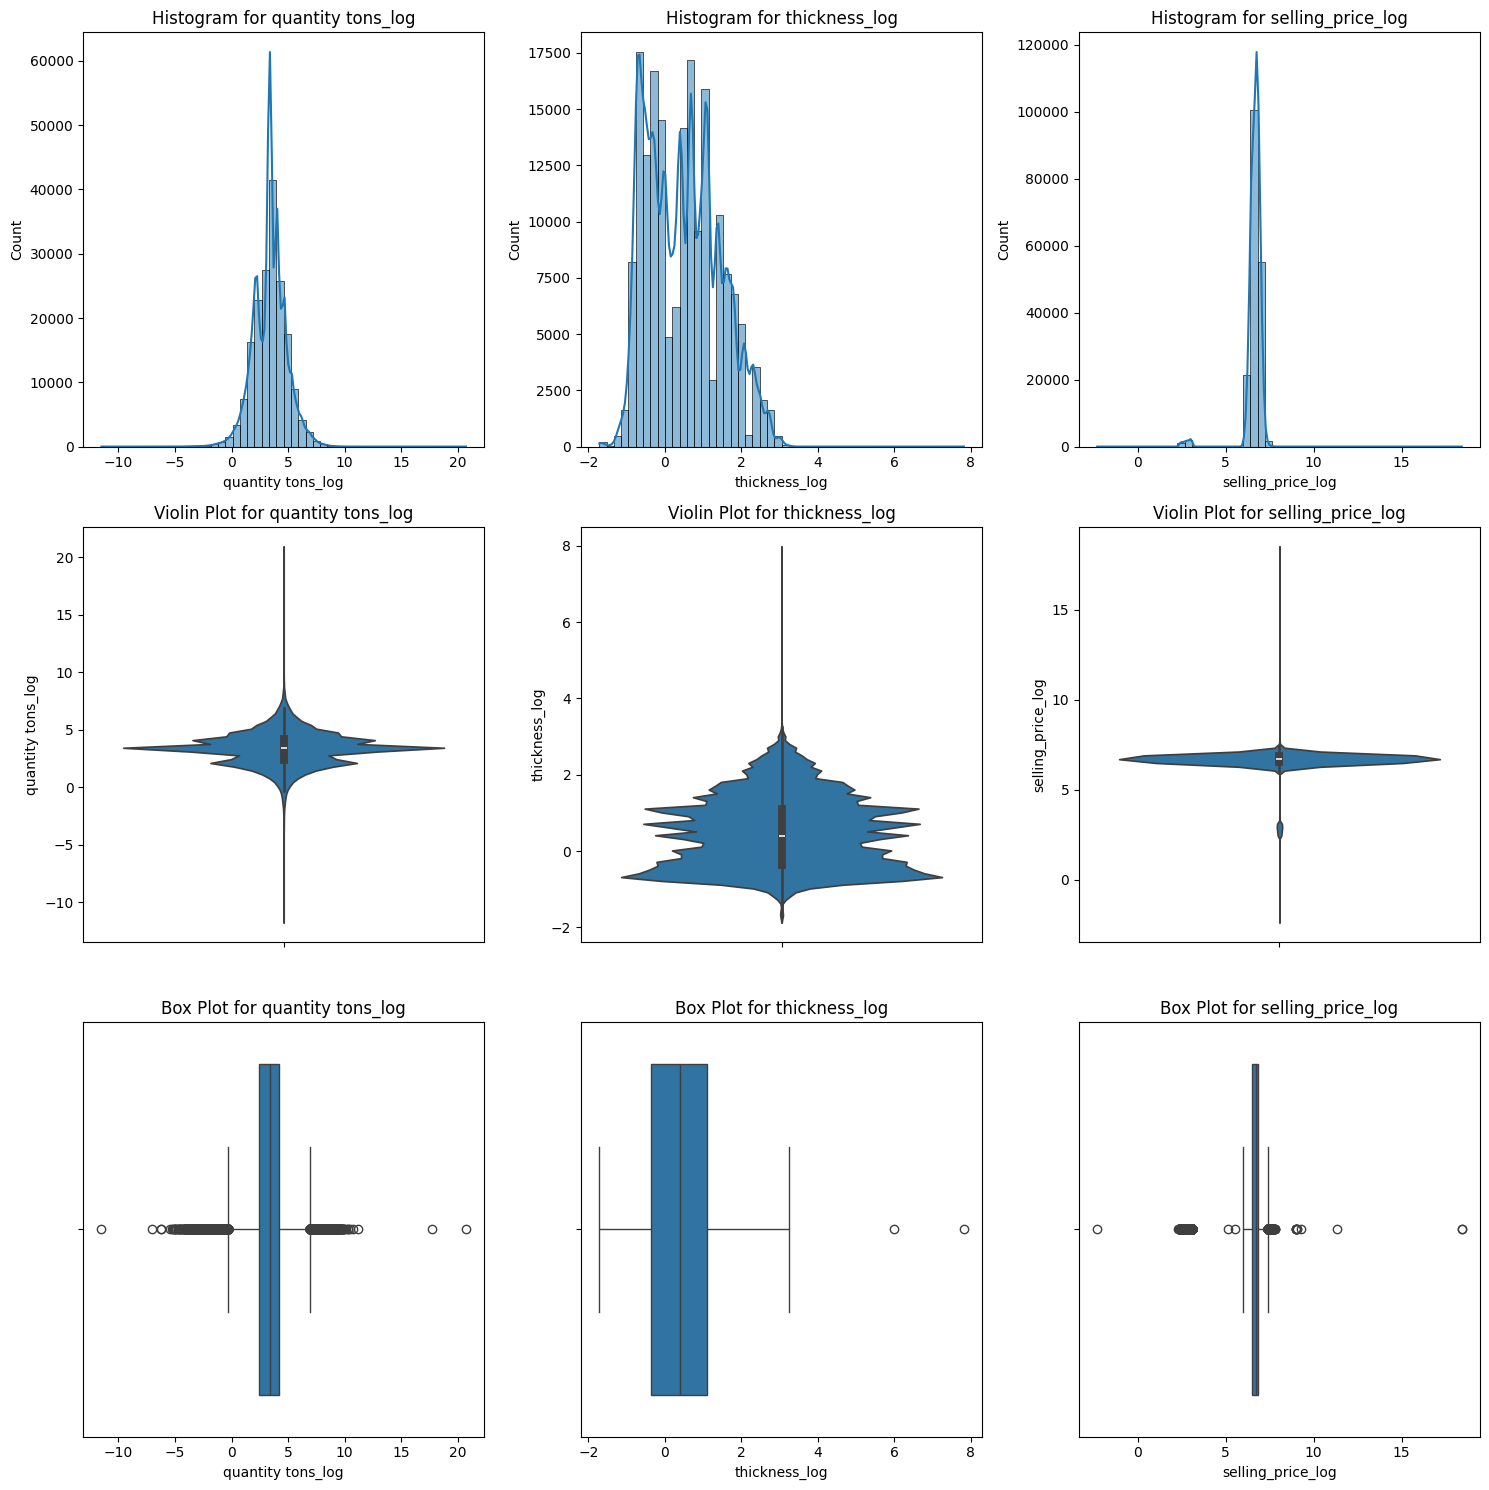

In [39]:
#after log transformation the data are normally distributed and reduced the skewness. [hist plot , violin plot and box plot]
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# histogram for each log-transformed column
sns.histplot(skew_data['quantity tons_log'], kde=True, bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Histogram for quantity tons_log')

sns.histplot(skew_data['thickness_log'], kde=True, bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Histogram for thickness_log')

sns.histplot(skew_data['selling_price_log'], kde=True, bins=50, ax=axes[0, 2])
axes[0, 2].set_title('Histogram for selling_price_log')

# violin plot for each log-transformed column
sns.violinplot(y=skew_data['quantity tons_log'], ax=axes[1, 0])
axes[1, 0].set_title('Violin Plot for quantity tons_log')

sns.violinplot(y=skew_data['thickness_log'], ax=axes[1, 1])
axes[1, 1].set_title('Violin Plot for thickness_log')

sns.violinplot(y=skew_data['selling_price_log'], ax=axes[1, 2])
axes[1, 2].set_title('Violin Plot for selling_price_log')

# box plot for each log-transformed column
sns.boxplot(x=skew_data['quantity tons_log'], ax=axes[2, 0])
axes[2, 0].set_title('Box Plot for quantity tons_log')

sns.boxplot(x=skew_data['thickness_log'], ax=axes[2, 1])
axes[2, 1].set_title('Box Plot for thickness_log')

sns.boxplot(x=skew_data['selling_price_log'], ax=axes[2, 2])
axes[2, 2].set_title('Box Plot for selling_price_log')

plt.tight_layout()
plt.show()

In [40]:
from scipy.stats import skew

def skewness(skew_data, columns):
    skewness_dict = {}
    for col in columns:
        skewness_dict[col] = skew(skew_data[col])
    return skewness_dict

skewness_re = skewness(skew_data, ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'selling_price','delivery_time_taken'])

# Print the skewness values
for col, skew_value in skewness_re.items():
    print(f"{col}: {skew_value}")

quantity tons: 424.6767902319119
customer: 86.98243470180927
country: 0.7537785983795972
application: 0.7245813794078412
thickness: 303.43942554730626
width: 0.3745647522411426
product_ref: 1.015222978741429
selling_price: 301.3781341091695
delivery_time_taken: 0.4697479192708294


In [41]:
#Interquartile Range (IQR) method
out_col = ['quantity tons', 'thickness', 'width', 'selling_price']
before = skew_data[out_col].describe()

# Iterate over outlier columns and remove outliers
for column in out_col:
    Q1 = skew_data[column].quantile(0.30)
    Q3 = skew_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    skew_data = skew_data[(skew_data[column] >= lower_bound) & (skew_data[column] <= upper_bound)]

# Calculate summary statistics after removing outliers
after = skew_data[out_col].describe()

# Compare the statistics before and after outlier removal
print("Summary statistics before removing outliers:")
print(before)
print("\nSummary statistics after removing outliers:")
print(after)

Summary statistics before removing outliers:
       quantity tons      thickness          width  selling_price
count   1.816640e+05  181664.000000  181664.000000   1.816640e+05
mean    5.875194e+03       2.564872    1295.288874   1.918129e+03
std     2.349133e+06       6.572452     261.637120   3.318029e+05
min     1.000000e-05       0.180000       1.000000   0.000000e+00
25%     1.097122e+01       0.700000    1180.000000   6.690000e+02
50%     3.036501e+01       1.500000    1250.000000   8.120000e+02
75%     6.716061e+01       3.000000    1500.000000   9.530000e+02
max     1.000000e+09    2500.000000    2990.000000   1.000010e+08

Summary statistics after removing outliers:
       quantity tons      thickness          width  selling_price
count  132612.000000  132612.000000  132612.000000  132612.000000
mean       35.587632       1.803260    1265.160872     840.966266
std        31.886498       1.441638     174.824312     189.096256
min         0.000010       0.180000     855.000000  

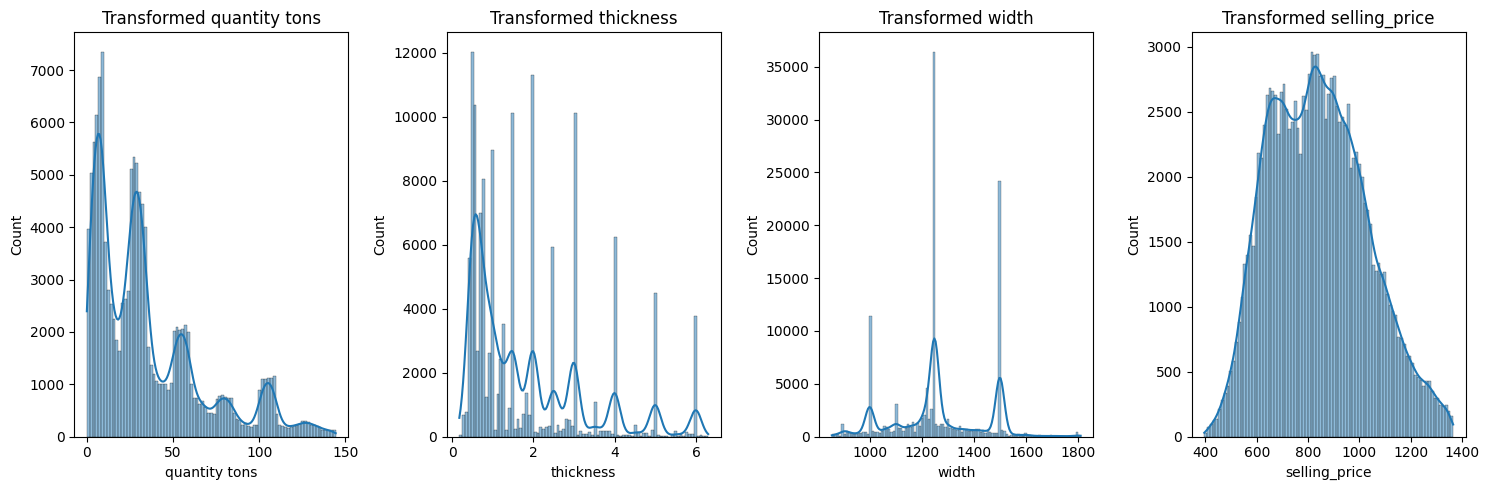

In [42]:
#transform the outliers to within range using IQR 
out_col = ['quantity tons', 'thickness', 'width', 'selling_price']

# Plot the histograms of the transformed data
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes = axes.flatten()
for i, column in enumerate(out_col):
    sns.histplot(skew_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Transformed {column}")

plt.tight_layout()
plt.show()

In [43]:
data_model=skew_data.copy(True)
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132612 entries, 0 to 181670
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   item_date            132612 non-null  datetime64[ns]
 1   quantity tons        132612 non-null  float64       
 2   customer             132612 non-null  float64       
 3   country              132612 non-null  int64         
 4   status               132612 non-null  object        
 5   item type            132612 non-null  object        
 6   application          132612 non-null  float64       
 7   thickness            132612 non-null  float64       
 8   width                132612 non-null  float64       
 9   material_ref         132612 non-null  object        
 10  product_ref          132612 non-null  int64         
 11  delivery date        132612 non-null  datetime64[ns]
 12  selling_price        132612 non-null  float64       
 13  delivery_time_taken

In [44]:
data_model.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time_taken,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,91.0,3.991779,0.693147,6.749931
7,2021-04-01,113.387124,30342192.0,32,Won,W,41.0,0.68,1220.0,unknown,611993,2021-01-01,931.0,90.0,4.730808,-0.385662,6.836259
8,2021-04-01,69.071853,30341428.0,38,Won,S,10.0,0.60,1275.0,unknown,1668701376,2021-07-01,1363.0,91.0,4.235147,-0.510826,7.217443
11,2021-04-01,113.995666,30342192.0,32,Won,W,41.0,0.55,1220.0,unknown,611993,2021-01-01,954.0,90.0,4.736160,-0.597837,6.860664
12,2021-04-01,27.512545,30165529.0,78,Won,W,10.0,0.75,1250.0,unknown,164141591,2021-07-01,1098.0,91.0,3.314642,-0.287682,7.001246


<Axes: >

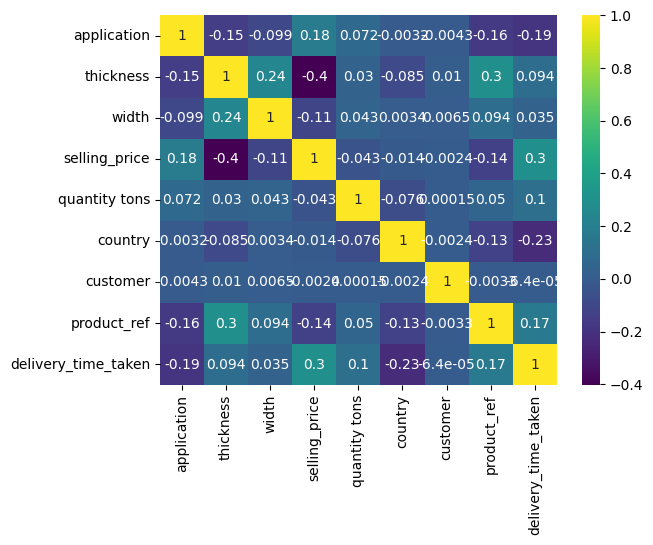

In [45]:
#Heatmap for find the correlation between the data:

c = data_model[['application','thickness','width','selling_price','quantity tons','country','customer','product_ref','delivery_time_taken']].corr()
sns.heatmap(c, annot=True, cmap="viridis")

In [46]:
data_model['quantity tons'].unique()

array([ 54.15113862, 113.38712363,  69.0718528 , ..., 106.7832992 ,
       102.48242163,   4.23559357])

In [47]:
#Finding unique value:
#country
data_model['country'] = data_model['country'].astype(str)
country=data_model['country'].unique()


In [48]:
country

array(['28', '32', '38', '78', '27', '30', '25', '77', '39', '40', '26',
       '84', '80', '79', '113', '89'], dtype=object)

In [49]:
#status
status=data_model['status'].unique()

In [50]:
status

array(['Won', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful',
       'Revised', 'Offered', 'Offerable'], dtype=object)

In [51]:
#item_type
item_ty=data_model['item type'].unique()

In [52]:
item_ty

array(['W', 'S', 'Others', 'PL', 'WI', 'IPL'], dtype=object)

In [53]:
#encode country
encode=LabelEncoder()
encode_country=encode.fit(country)
transformed_country = encode_country.transform(country)
print(transformed_country)


[ 4  6  7 11  3  5  1 10  8  9  2 14 13 12  0 15]


In [54]:
#encode status
encode=LabelEncoder()
encode_status=encode.fit(status)
transformed_status = encode_status.transform(status)
print(transformed_status)


[6 5 0 1 7 4 3 2]


In [55]:
#encode item_type
encode=LabelEncoder()
encode_item=encode.fit(item_ty)
transformed_item = encode_item.transform(item_ty)
print(transformed_item)

[4 3 1 2 5 0]


In [56]:
for x, y in zip(status, transformed_status):
    print('before encoding :',x,'--- encoded :',y)

before encoding : Won --- encoded : 6
before encoding : To be approved --- encoded : 5
before encoding : Lost --- encoded : 0
before encoding : Not lost for AM --- encoded : 1
before encoding : Wonderful --- encoded : 7
before encoding : Revised --- encoded : 4
before encoding : Offered --- encoded : 3
before encoding : Offerable --- encoded : 2


In [57]:
import pickle

file_path1='country.pkl'
file_path2='status.pkl'
file_path3='item type.pkl'

with open(file_path1, 'wb') as file:
    pickle.dump(encode_country, file)
with open(file_path2, 'wb') as file:
    pickle.dump(encode_status, file)
with open(file_path3, 'wb') as file:
    pickle.dump(encode_item, file)

print(f'Pickle file created: {file_path1}, {file_path2},{file_path3}')

Pickle file created: country.pkl, status.pkl,item type.pkl


In [58]:
with open('status.pkl', 'rb') as file:
    encode_status = pickle.load(file)
    
transformed_status = encode_status.transform(status)
transformed_status

array([6, 5, 0, 1, 7, 4, 3, 2])

In [59]:
!pip install xgboost

In [60]:
#REGRESSION MODEL FOR FINDING SELLING PRICE:
cate_col=['status', 'item type','country']
encoder= LabelEncoder()
for i in cate_col:
    print(i)
    data_model[i] = encoder.fit_transform(data_model[i])
    print(data_model[i].unique())

status
[6 5 0 1 7 4 3 2]
item type
[4 3 1 2 5 0]
country
[ 4  6  7 11  3  5  1 10  8  9  2 14 13 12  0 15]


In [61]:
data_model

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time_taken,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,4,6,4,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,91.0,3.991779,0.693147,6.749931
7,2021-04-01,113.387124,30342192.0,6,6,4,41.0,0.68,1220.0,unknown,611993,2021-01-01,931.0,90.0,4.730808,-0.385662,6.836259
8,2021-04-01,69.071853,30341428.0,7,6,3,10.0,0.60,1275.0,unknown,1668701376,2021-07-01,1363.0,91.0,4.235147,-0.510826,7.217443
11,2021-04-01,113.995666,30342192.0,6,6,4,41.0,0.55,1220.0,unknown,611993,2021-01-01,954.0,90.0,4.736160,-0.597837,6.860664
12,2021-04-01,27.512545,30165529.0,11,6,4,10.0,0.75,1250.0,unknown,164141591,2021-07-01,1098.0,91.0,3.314642,-0.287682,7.001246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181665,2020-07-02,6.169226,30200854.0,1,6,4,41.0,0.71,1300.0,unknown,164141591,2020-07-01,608.0,1.0,1.819573,-0.342490,6.410175
181666,2020-07-02,82.123794,30200854.0,1,6,4,41.0,1.18,1220.0,unknown,164141591,2020-07-01,590.0,1.0,4.408228,0.165514,6.380123
181667,2020-07-02,106.783299,30200854.0,1,6,4,41.0,0.96,1240.0,unknown,164141591,2020-07-01,602.0,1.0,4.670802,-0.040822,6.400257
181668,2020-07-02,102.482422,30200854.0,1,6,4,41.0,0.96,1220.0,unknown,164141591,2020-07-01,591.0,1.0,4.629691,-0.040822,6.381816


In [62]:

X = data_model[[ 'quantity tons','thickness','width','country','status','item type', 'application','product_ref','delivery_time_taken']].values
y = data_model[['selling_price']].values

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
file_path4='scaling.pkl'
with open(file_path4, 'wb') as file:
    pickle.dump(scaler, file)
print(f'Pickle file created: {file_path4}')

Pickle file created: scaling.pkl


In [64]:
# Create an instance of each regression model
ext_model = ExtraTreesRegressor()
xgb_model = XGBRegressor()
dect_model = DecisionTreeRegressor()

# Train the models
ext_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
dect_model.fit(X_train, y_train)

# Make predictions on the test set
ext_preds = ext_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
dect_preds = dect_model.predict(X_test)

In [65]:
# Evaluate the models

ext_mse = mean_squared_error(y_test, ext_preds)
ext_mae = mean_absolute_error(y_test, ext_preds)
ext_r2 = r2_score(y_test, ext_preds)

xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

dect_mse = mean_squared_error(y_test, dect_preds)
dect_mae = mean_absolute_error(y_test, dect_preds)
dect_r2 = r2_score(y_test, dect_preds)

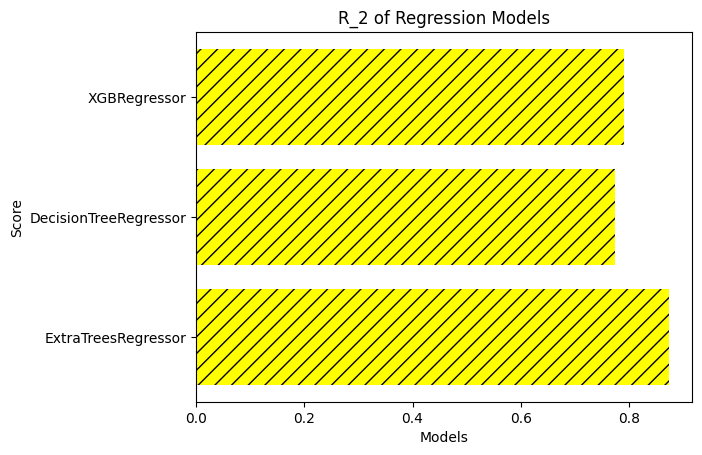

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

ExtraTreesRegressor 0.873335349885688
DecisionTreeRegressor 0.7745726334390644
XGBRegressor 0.7903489935748806

Model: ExtraTreesRegressor contain Maximum R2_Score: 0.873335349885688 


In [95]:
models = ['ExtraTreesRegressor', 'DecisionTreeRegressor', 'XGBRegressor']
score = [ext_r2, dect_r2, xgb_r2]

plt.barh(models, score, color='yellow',hatch='//')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('R_2 of Regression Models')
plt.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

In [67]:
model=ext_model.fit(X_train, y_train)

In [68]:
model

ExtraTreesRegressor()

In [69]:
file_path5='Extratreeregressor.pkl'
with open(file_path5, 'wb') as file:
    pickle.dump(model, file)
print(f'Pickle file created: {file_path5}')

Pickle file created: Extratreeregressor.pkl


In [70]:
quantity=input('Enter quantity :')
thickness=input('Enter thickness :')
width=input('Enter width :')

new_sample_cou = input("Enter a country: ")
c = None
for i, j in zip(country, transformed_country):
    if new_sample_cou == i:
        c = j
        break
else:
    print("Country not found.")
    exit()

new_sample_sta = input("Enter a status: ")
s = None
for i, j in zip(status, transformed_status):
    if new_sample_sta == i:
        s = j
        break
else:
    print("Status not found.")
    exit()

new_sample_ite = input("Enter an item type: ")
it = None
for i, j in zip(item_ty, transformed_item):
    if new_sample_ite == i:
        it = j
        break
else:
    print("Item type not found.")
    exit()


x = [quantity,thickness,width,c, s, it, 41.0,611993, 28]
x = np.array(x).reshape(1, -1)  # Reshape to 2D array
new_sample_scaled = scaler.transform(x)
new_pred = ext_model.predict(new_sample_scaled)
print('Predicted selling price:',new_pred )

Predicted selling price: [825.8849]


In [72]:
#CLASSIFICATION MODEL FOR PREDICT THE STATUS WON/LOST:

X = data_model[[ 'quantity tons','thickness','width','selling_price','country','item type','application','product_ref','delivery_time_taken']].values
y = data_model[['status']].values

scaler_classify = StandardScaler().fit(X)
X = scaler_classify.transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [73]:
file_path6='scaling_classify.pkl'
with open(file_path6, 'wb') as file:
    pickle.dump(scaler_classify, file)
print(f'Pickle file created: {file_path6}')

Pickle file created: scaling_classify.pkl


In [74]:
# Create an instance of each regression model
raf_model = RandomForestClassifier()
xgb_cls_model = xgb.XGBClassifier()
svm_model = SVC()

# Train the models
raf_model.fit(X_train, y_train)
xgb_cls_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
raf_preds = raf_model.predict(X_test)
xgb_cls_preds = xgb_cls_model.predict(X_test)
svm_preds = svm_model.predict(X_test)

# Evaluate the models
raf_accuracy = accuracy_score(y_test, raf_preds)
xgb_cls_accuracy = accuracy_score(y_test, xgb_cls_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)

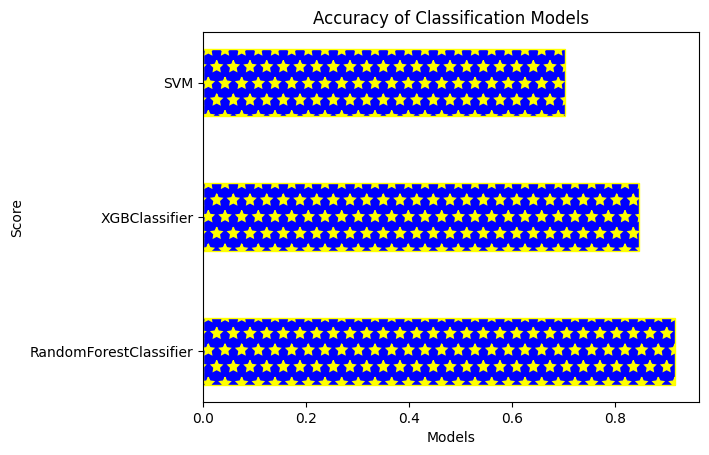

FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY

RandomForestClassifier 0.9163482807158657
XGBClassifier 0.8462195857631208
SVM 0.7027196863060526

Model: RandomForestClassifier contain Maximum accuracy: 0.9163482807158657 


In [94]:
models = ['RandomForestClassifier', 'XGBClassifier', 'SVM']
score = [raf_accuracy, xgb_cls_accuracy, svm_accuracy]

plt.barh(models, score, color='blue',height=0.5,hatch='*',edgecolor='yellow')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Accuracy of Classification Models')
plt.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum accuracy: {max_score} ")

In [76]:
model_cls=raf_model.fit(X_train, y_train)

In [77]:
file_path7='randomforest_classification.pkl'
with open(file_path7, 'wb') as file:
    pickle.dump(model_cls, file)
print(f'Pickle file created: {file_path7}')

Pickle file created: randomforest_classification.pkl


In [79]:
quantity=input('Enter quantity :')
thickness=input('Enter thickness :')
width=input('Enter width :')
selling_price=input('Enter selling price :')

new_sample_co = input("Enter a country: ")
c = None
for i, j in zip(country, transformed_country):
    if new_sample_co == i:
        c = j
        break
else:
    print("Country not found.")
    exit()

new_sample_it = input("Enter an item type: ")
it = None
for i, j in zip(item_ty, transformed_item):
    if new_sample_it == i:
        it = j
        break
else:
    print("Item type not found.")
    exit()

x = [quantity,thickness,width,selling_price,c,it, 10.0,1670798778, 91]
x = np.array(x).reshape(1, -1)  # Reshape to 2D array
new_sample_scaled = scaler_classify.transform(x)
new_pred = raf_model.predict(new_sample_scaled)

if new_pred==6:
    print('WON' )
else:
    print('LOST')

WON


In [ ]:
Enter quantity :7589654
Enter thickness :0.98
Enter width :1200.37
Enter selling price :632548
Enter a country: 28
Enter an item type: W
WON